In [9]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
import matplotlib
from scipy.ndimage import gaussian_filter1d
# plt.style.use('ggplot')
sns.set_theme(context="notebook", style="darkgrid")
sns.set(font_scale=2.5)

PROJECT_ROOT_DIR = Path().absolute().parent.parent
PROJECT_ROOT_DIR

PosixPath('/home/sen/pythonprojects/fly-craft-examples')

In [10]:
def load_data(algo: str, filename: str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True):
    df = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / filename / "progress.csv")
    df = df[pd.notnull(df["eval/success_rate"])]
    df.insert(insert_no, "seed", [seed_str] * len(df))
    df.insert(insert_no+1, "algo", [algo] * len(df))

    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        df["eval/success_rate"] = gaussian_filter1d(df["eval/success_rate"], sigma=1)

    return df

In [11]:
def load_two_stage_data(algo: str, first_stage_filename: str,second_stage_filename:str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True, time_steps_add_to_sec_stage: int=500000):
    df_first_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / first_stage_filename / "progress.csv")
    df_first_stage = df_first_stage[pd.notnull(df_first_stage["eval/success_rate"])]

    df_second_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / second_stage_filename / "progress.csv")
    df_second_stage = df_second_stage[pd.notnull(df_second_stage["eval/success_rate"])]

    df_second_stage["time/total_timesteps"] = df_second_stage["time/total_timesteps"] + time_steps_add_to_sec_stage
    
    merge_df = pd.concat([df_first_stage,df_second_stage],ignore_index=True)
    merge_df.insert(insert_no, "seed", [seed_str] * len(merge_df))
    merge_df.insert(insert_no+1, "algo", [algo] * len(merge_df))


    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        merge_df["eval/success_rate"] = gaussian_filter1d(merge_df["eval/success_rate"], sigma=1)

    return merge_df

In [12]:
def load_three_stage_data(algo: str, first_stage_filename: str,second_stage_filename:str, three_stage_filename:str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True, time_steps_add_to_sec_stage: int=500000):
    df_first_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / first_stage_filename / "progress.csv")
    df_first_stage = df_first_stage[pd.notnull(df_first_stage["eval/success_rate"])]

    df_second_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / second_stage_filename / "progress.csv")
    df_second_stage = df_second_stage[pd.notnull(df_second_stage["eval/success_rate"])]
    df_second_stage["time/total_timesteps"] = df_second_stage["time/total_timesteps"] + time_steps_add_to_sec_stage
    
    df_three_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / three_stage_filename / "progress.csv")
    df_three_stage = df_three_stage[pd.notnull(df_three_stage["eval/success_rate"])]

    df_three_stage["time/total_timesteps"] = df_three_stage["time/total_timesteps"] + 2*time_steps_add_to_sec_stage

    merge_df = pd.concat([df_first_stage,df_second_stage,df_three_stage],ignore_index=True)
    merge_df.insert(insert_no, "seed", [seed_str] * len(merge_df))
    merge_df.insert(insert_no+1, "algo", [algo] * len(merge_df))


    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        merge_df["eval/success_rate"] = gaussian_filter1d(merge_df["eval/success_rate"], sigma=1)

    return merge_df

In [13]:
SMOOTH = True

In [14]:
def load_data_add_step(algo: str, filename: str, seed_str: str, insert_no: int=19, algo_dir: str="rl" ,smooth_success_rate: bool=True, time_steps_add:int=500000):
    df = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / filename / "progress.csv")
    df = df[pd.notnull(df["eval/success_rate"])]
    df.insert(insert_no, "seed", [seed_str] * len(df))
    df.insert(insert_no+1, "algo", [algo] * len(df))
    df["time/total_timesteps"] = df["time/total_timesteps"] + time_steps_add

    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        df["eval/success_rate"] = gaussian_filter1d(df["eval/success_rate"], sigma=1)

    return df

## b = 0.5 to b = 1 buffersize 1e6

1000
800


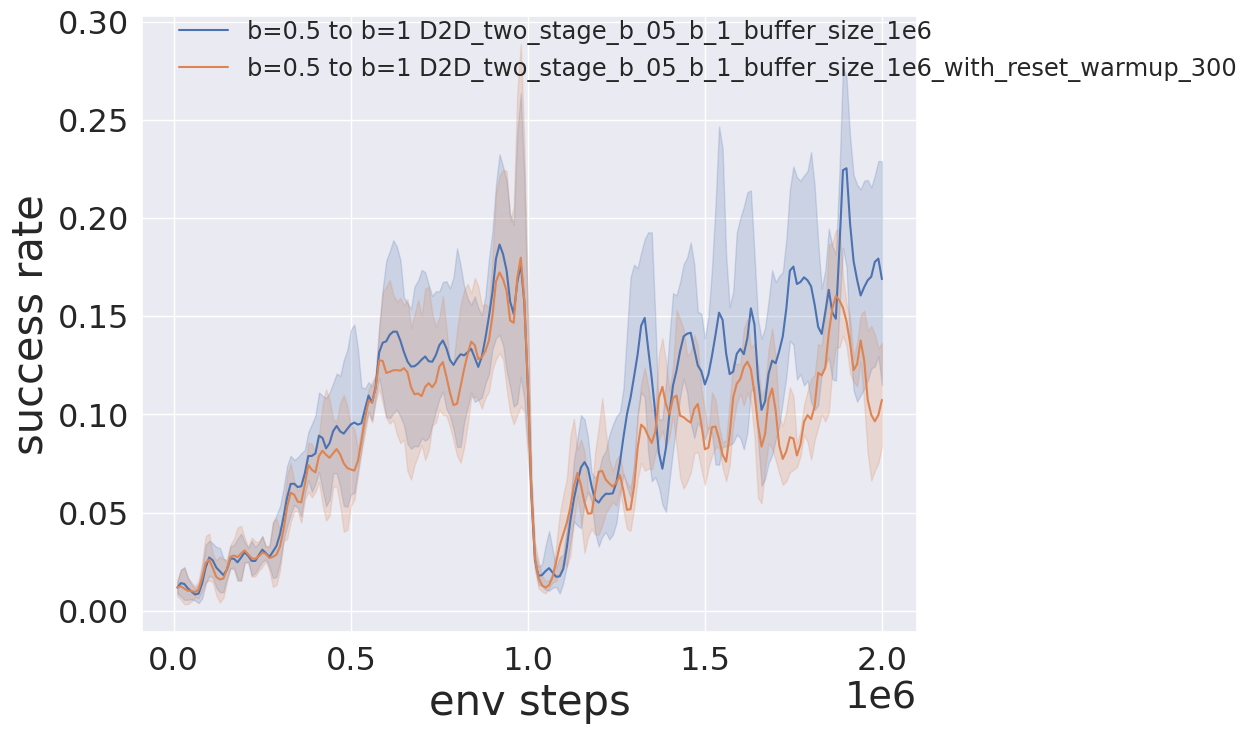

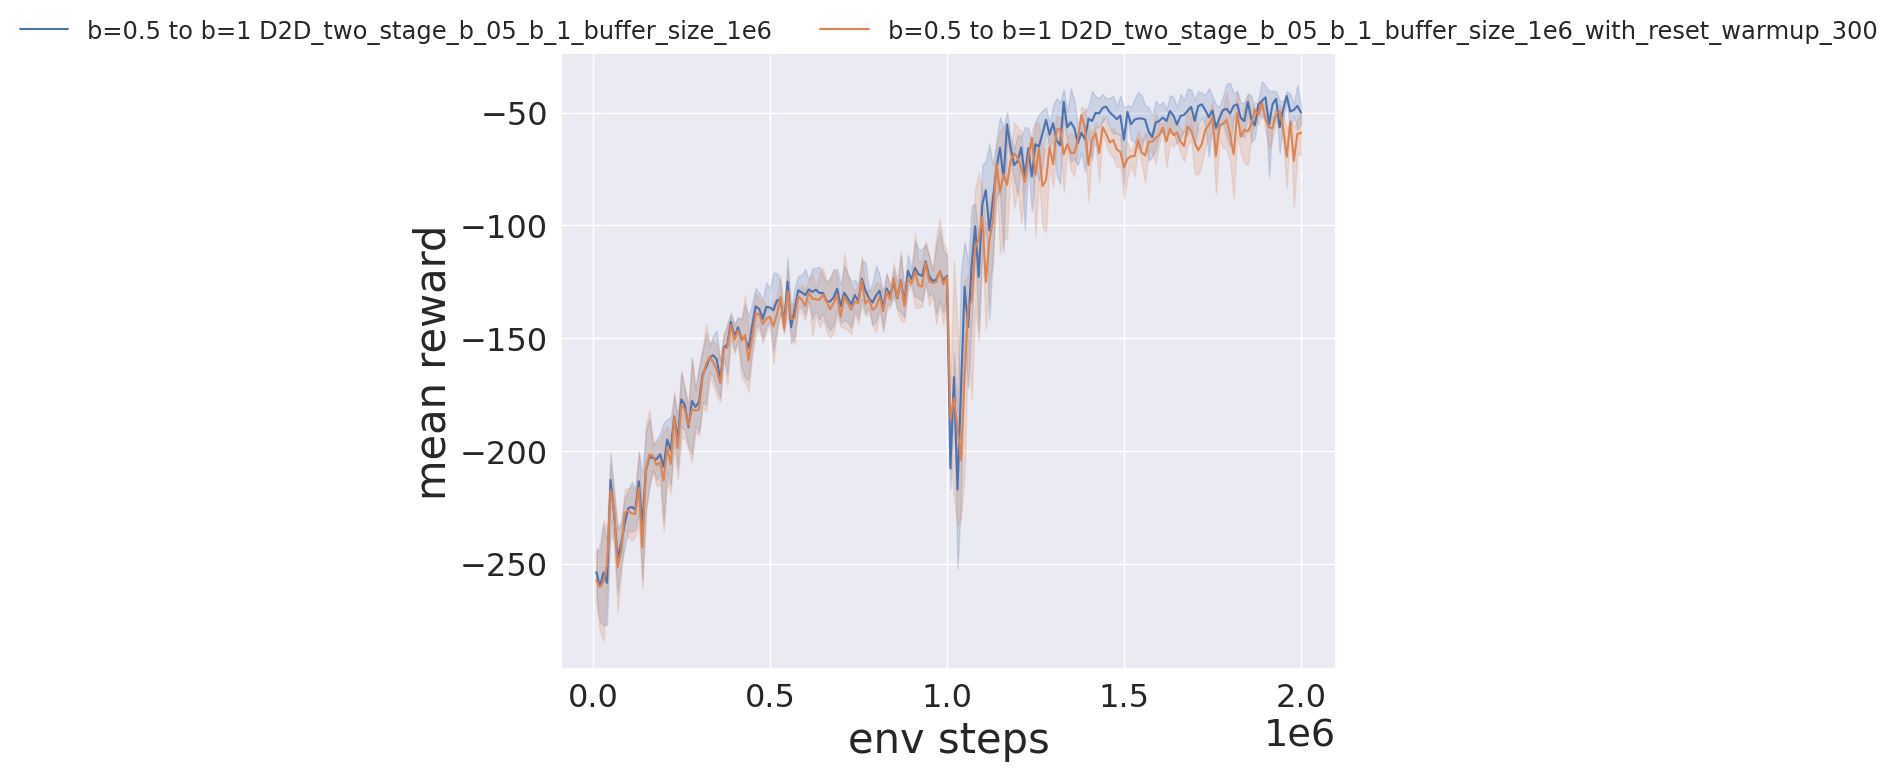

In [16]:
first_files = [
   "D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6/sac_10hz_128_128_b_05_1e6steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6/sac_10hz_128_128_b_05_1e6steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6/sac_10hz_128_128_b_05_1e6steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6/sac_10hz_128_128_b_05_1e6steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6/sac_10hz_128_128_b_05_1e6steps_seed_5_singleRL",
]


second_files = [
    "D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6/sac_10hz_128_128_b_05_1e6steps_b_1_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6/sac_10hz_128_128_b_05_1e6steps_b_1_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6/sac_10hz_128_128_b_05_1e6steps_b_1_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6/sac_10hz_128_128_b_05_1e6steps_b_1_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6/sac_10hz_128_128_b_05_1e6steps_b_1_1e6steps_seed_5_singleRL",  
]

seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_D2D_two_stage_b_05_b_1_buffer_size_1e6 = pd.concat([load_two_stage_data("b=0.5 to b=1 D2D_two_stage_b_05_b_1_buffer_size_1e6", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=1000000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_D2D_two_stage_b_05_b_1_buffer_size_1e6))


first_files = [
   "D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6/sac_10hz_128_128_b_05_1e6steps_seed_1_singleRL",
   #"D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6/sac_10hz_128_128_b_05_1e6steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6/sac_10hz_128_128_b_05_1e6steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6/sac_10hz_128_128_b_05_1e6steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6/sac_10hz_128_128_b_05_1e6steps_seed_5_singleRL",
]


second_files = [
    "D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6_warmup300/sac_10hz_128_128_b_05_1e6steps_b_1_1e6steps_seed_1_singleRL", 
    #"D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6_warmup300/sac_10hz_128_128_b_05_1e6steps_b_1_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6_warmup300/sac_10hz_128_128_b_05_1e6steps_b_1_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6_warmup300/sac_10hz_128_128_b_05_1e6steps_b_1_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_05_b_1/buffer_size1e6_warmup300/sac_10hz_128_128_b_05_1e6steps_b_1_1e6steps_seed_5_singleRL",  
]

seed_strs = [
    "seed 1", 
    #"seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_D2D_two_stage_b_05_b_1_buffer_size_1e6_with_reset_warmup_300 = pd.concat([load_two_stage_data("b=0.5 to b=1 D2D_two_stage_b_05_b_1_buffer_size_1e6_with_reset_warmup_300", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=1000000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_D2D_two_stage_b_05_b_1_buffer_size_1e6_with_reset_warmup_300))



data_plot = pd.concat([
df_D2D_two_stage_b_05_b_1_buffer_size_1e6,
df_D2D_two_stage_b_05_b_1_buffer_size_1e6_with_reset_warmup_300

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"



data_plot2 = pd.concat([
df_D2D_two_stage_b_05_b_1_buffer_size_1e6,
df_D2D_two_stage_b_05_b_1_buffer_size_1e6_with_reset_warmup_300

])
# 取部分数据做图
f2, ax2 = plt.subplots(figsize=(10, 8))
ax2 = sns.lineplot(x="time/total_timesteps", y="eval/mean_reward", hue="algo", data=data_plot2, ax=ax2)
ax2.tick_params(axis='both',labelsize=23)
# ax.axhline(y=0.61, c='g', ls='--', lw=1, label='bc')
# ax.axhline(y=0., c='b', ls='--', lw=1, label='rl_single')
# plt.legend()  # 显示水平辅助线的图例
# ax.set_xlabel("训练步数", fontproperties=SimHei)
# ax.set_ylabel("任务完成率", fontproperties=SimHei)
ax2.set_xlabel("env steps")
ax2.set_ylabel("mean reward")
# ax2.set_title("generation = 1")

sns.move_legend(ax2, "lower center", bbox_to_anchor=(.5, 0.98), ncol=3, title=None, frameon=False, fontsize="xx-small")